<h1 style = "font-size:3rem;color:darkcyan"> Training a Neural Network </h1>

implementing backward propagation from scratch


In [8]:
# import libraries
import numpy as np
import math
from random import random
import matplotlib.pyplot as plt

In [266]:
class ANN:
    
    def __init__(self,n_inputs = 3, hidden_layer_sizes = [3,4], n_targets = 1):
        self.n_inputs = n_inputs
        self.hidden_layer_sizes = hidden_layer_sizes
        self.n_targets = n_targets
        
        layers = [self.n_inputs] + self.hidden_layer_sizes + [self.n_targets]
        print(layers)
        
        self.weights = [np.random.rand(layers[i], layers[i+1]) for i in range(len(layers)-1)]
        self.biases = [np.random.rand(layers[i]) for i in range(1, len(layers))]
        self.activations = [np.zeros(layers[i]) for i in range(len(layers))]
        self.derivatives = [np.zeros((layers[i], layers[i+1])) for i in range(len(layers)-1)]
        self.deltas = [np.zeros(layers[i]) for i in range(1, len(layers))]
        
    def _sigmoid(self, net_inputs):
        a = 1 / (1 + np.exp(-net_inputs))
        return a
    
    def _sigmoid_dh(self, x):
        da = x * (1.0 - x)
        return da
    
    def _activate(self, inputs, W, b):
        net_inputs = np.dot(inputs, W) + b # summation
        activation = self._sigmoid(net_inputs) # modulation
        return activation
    
    def _forward_propagate(self, inputs):
        activations = inputs
        self.activations[0] = activations
        for i in range(len(self.weights)):
            activations = self._activate(activations, self.weights[i], self.biases[i])
            self.activations[i+1] = activations
        return activations
    
    def _back_propagate(self, error, verbose=False):
        # calculate error gradient
        for i in reversed(range(len(self.derivatives))):
            activations = self.activations[i+1]
            delta = error * self._sigmoid_dh(activations)
            self.deltas[i] = delta
            delta_reshaped =  delta.reshape(delta.shape[0], -1).T
            current_activations = self.activations[i]
            current_activations_reshaped = current_activations.reshape(current_activations.shape[0], -1)
            self.derivatives[i] = np.dot(current_activations_reshaped, delta_reshaped)
            error = np.dot(delta, self.weights[i].T)
            
            if verbose:
                print(f'Derivatives for W[{i}] = {self.derivatives[i]}')
                
        return error
         
    def _gradient_descent(self, learning_rate):
        for i in range(len(self.weights)):
            # print(f'Original weights = {self.weights[i]}')
            self.weights[i] += self.derivatives[i] * learning_rate
            self.biases[i] += self.deltas[i] * learning_rate
            # print(f'Updated weights = {self.weights[i]}')
    
    def _mse(self, target, output):
        return np.average((target - output)**2)
    
    def train_neural_network(self, inputs, targets, learning_rate, max_epochs):
        if np.array(inputs).shape[1] != self.n_inputs:
            print("Number of inputs does not match the input layer!")
            return None
        
        if np.array(targets).shape[1] != self.n_targets:
            print("Number of targets does not match the output layer!")
            return None
        
        # repeat for max_epochs or when target error rate is achieved
        for i in range(max_epochs):
            sum_error = 0
            for x,target in zip(inputs, targets):
                # propagate forward
                output = self._forward_propagate(x)

                # calculate new error
                error = target - output

                # propagate backward
                self._back_propagate(error)

                # gradient descent
                self._gradient_descent(learning_rate)

                # calc sum error & print
                sum_error += self._mse(target, output)
            
            # print error after each epoch
            print(f'Error = {sum_error / len(inputs)} at epoch {i}')
        
        print(f'number of epochs exceeded ({i})')
        return self._forward_propagate(inputs)

In [267]:
ann = ANN(2, [5], 1)

[2, 5, 1]


In [268]:
learning_rate = 0.1
epochs = 50

# train model to add inputs
inputs = np.array([[random() / 2 for _ in range(2)] for _ in range(1000)])
targets = np.array([[i[0] + i[1]] for i in inputs])

In [269]:
print(f'Inputs: {inputs[0, 0]} and {inputs[0 , 1]} and targets = {targets[0]}')

Inputs: 0.42750004108341977 and 0.06494491178825285 and targets = [0.49244495]


In [270]:
out = ann.train_neural_network(inputs, targets, learning_rate, epochs)

Error = 0.06470267347687113 at epoch 0
Error = 0.04334658904986824 at epoch 1
Error = 0.042676227739546296 at epoch 2
Error = 0.04198950441234916 at epoch 3
Error = 0.0412419493736393 at epoch 4
Error = 0.04038752190867369 at epoch 5
Error = 0.03937602458816171 at epoch 6
Error = 0.0381516002531141 at epoch 7
Error = 0.03665312452228002 at epoch 8
Error = 0.03481805843732294 at epoch 9
Error = 0.032591925947532775 at epoch 10
Error = 0.02994506699020228 at epoch 11
Error = 0.026895107359298502 at epoch 12
Error = 0.02352708286591666 at epoch 13
Error = 0.0199970655912987 at epoch 14
Error = 0.016507902554989993 at epoch 15
Error = 0.013261494899702915 at epoch 16
Error = 0.010409907776022246 at epoch 17
Error = 0.008029228231671492 at epoch 18
Error = 0.006123265315298055 at epoch 19
Error = 0.0046462507896376124 at epoch 20
Error = 0.0035288488755684916 at epoch 21
Error = 0.0026977576738521866 at epoch 22
Error = 0.0020867187560229604 at epoch 23
Error = 0.001640844142041238 at epoch

In [271]:
print(biases)

[array([ 1.1786079 ,  0.88602228, -1.6213292 , -0.83213841, -0.43964768]), array([-2.46343768])]


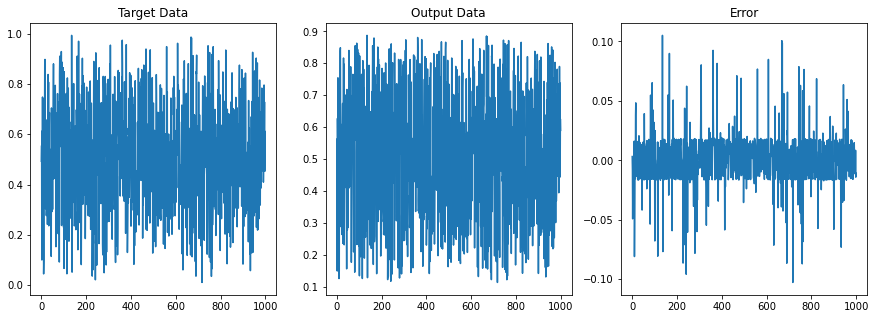

In [273]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.title('Target Data')
plt.plot(targets)
plt.subplot(1,3,2)
plt.title('Output Data')
plt.plot(out)
plt.subplot(1,3,3)
plt.title('Error')
plt.plot(targets - out)

In [265]:
# predict data
inputs = [0.4, 0.1]
output = inputs[0] + inputs[1]
y_pred = ann._forward_propagate(inputs)
print(f'Actual value: {output}, predicted value: {y_pred}')
print(f'Error = {output - y_pred}')

Actual value: 0.5, predicted value: [0.50040462]
Error = [-0.00040462]
